# WESAD
###  a Multimodal Dataset for Wearable Stress and Affect Detection

##### April 22, 2018


#### Useful Resources:
- https://github.com/jaganjag/stress_affect_detection
- https://github.com/arsen-movsesyan/springboard_WESAD

In [1]:
import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
subject = 'S4'

# E4 (wrist) Sampling Frequencies
fs_ACC = 32
fs_BVP = 64
fs_EDA = 4
fs_TEMP = 4

In [149]:
class SubjectData:
    
    def __init__(self, main_path, subject_number):
        
        self.name = f'S{subject_number}'
        self.subject_keys = ['signal', 'label', 'subject']
        self.signal_keys = ['chest', 'wrist']
        self.chest_keys = ['ACC', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp']
        self.wrist_keys = ['ACC', 'BVP', 'EDA', 'TEMP']
        with open(os.path.join(main_path, self.name) + '/' + self.name + '.pkl', 'rb') as file:
            self.data = pickle.load(file, encoding='latin1')
        self.labels = self.data['label']
        
    def get_wrist_data(self):
        return self.data['signal']['wrist']
    
    def get_chest_data(self):
        return self.data['signal']['chest']
    
    
    
    
    def extract_features(self): # only wrist
        results = \
            {
            key: get_statistics(self.get_wrist_data()[key].flatten(), self.labels)
            for key in self.wrist_keys
            }
        return results

In [160]:
from scipy import stats

def get_statistics(ecg_data, label=0, window_size=700, return_dict=True):
    mean_features = np.empty(int(len(ecg_data)/window_size), dtype=np.float64)
    std_features = np.empty(int(len(ecg_data)/window_size), dtype=np.float64)
    max_features = np.empty(int(len(ecg_data)/window_size), dtype=np.float64)
    min_features = np.empty(int(len(ecg_data)/window_size), dtype=np.float64)
    
    for i in range(int(len(ecg_data)/window_size)):
        temp = ecg_data[i*window_size:(i+1)*window_size]
        if i < int(len(ecg_data)/window_size):
            mean_features[i] = np.mean(temp)
            std_features[i] = np.std(temp)
            min_features[i] = np.amin(temp)
            max_features[i] = np.amax(temp)

    if return_dict:
        features = {'mean': mean_features, 'std':std_features, 'min':min_features, 'max':max_features}
        return features
    
    one_set = np.column_stack((mean_features, std_features, min_features, max_features))
    return one_set

In [151]:
subject = SubjectData(main_path='/Volumes/MyPassport/WESAD', subject_number=4)

In [161]:
feats = subject.extract_features()

In [162]:
feat_names = ['mean', 'std', 'min', 'max', 'label']
feats['EDA']
feat_df = pd.DataFrame(feats['EDA'], columns=feat_names)

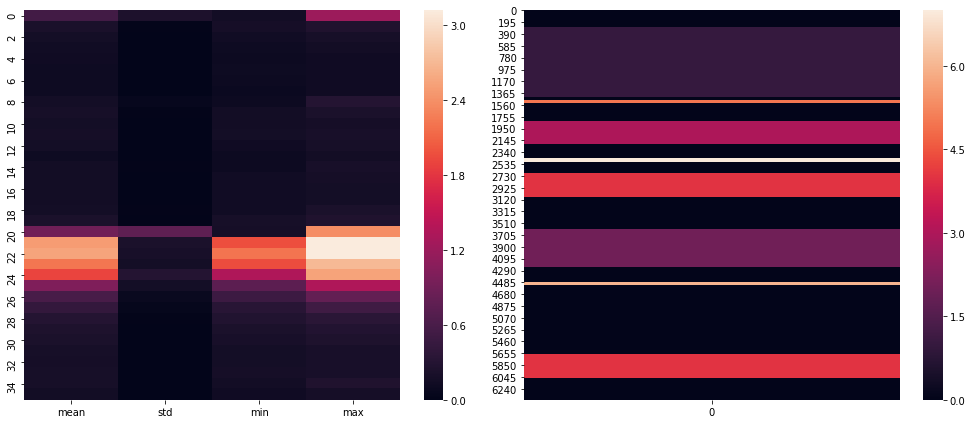

In [134]:
import seaborn as sns

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.heatmap(feat_df);

plt.subplot(1,2,2)
sns.heatmap(subject.labels[::700][None].T);

plt.tight_layout();

In [146]:
import statistics
statistics.mode(subject.labels[::700])

0

In [137]:
pd.DataFrame(subject.labels, columns=['label'])['label'].value_counts()

0    2314199
1     810601
4     563500
2     444500
3     260400
7      36401
5      35699
6      30800
Name: label, dtype: int64

In [140]:
# 1: baseline, 2: stress, 3: amusement
df = pd.DataFrame(subject.labels, columns=['label'])

In [142]:
baseline = np.asarray(df.groupby('label').groups[1])
baseline_data = 
stress = np.asarray(df.groupby('label').groups[2])
amusement = np.asarray(df.groupby('label').groups[3])
full_data = np.vstack((baseline_data, stress_data, amusement_data))

,label
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [42]:
#subject='S4'
baseline = np.asarray([idx for idx, val in enumerate(labels[subject]) if val == 1])
# print("Baseline:", chest_data_dict['ECG'][baseline].shape)
print(baseline.shape)

stress = np.asarray([idx for idx, val in enumerate(labels[subject]) if val == 2])
print(stress.shape)

amusement = np.asarray([idx for idx, val in enumerate(labels[subject]) if val == 3])



(810601,)
(444500,)


In [50]:
eda = wrist_data_dict['EDA']

In [51]:
feats = get_statistical_moments(eda)

In [81]:
subject.labels.shape

(4496100,)

In [86]:
labs = subject.labels[::700]
labs.shape

(6423,)

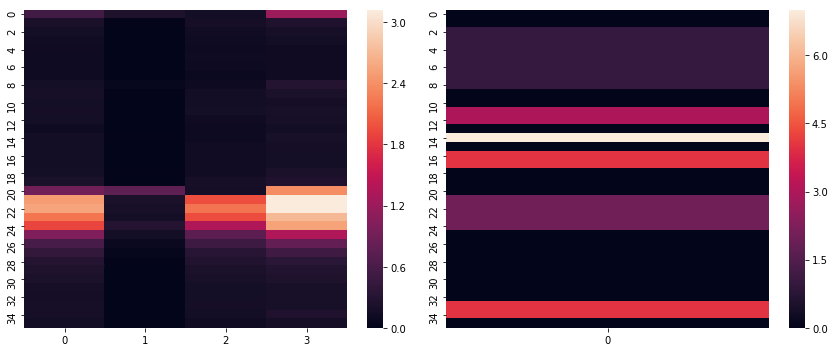

In [76]:
import seaborn as sns

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.heatmap(feats);

plt.subplot(1,2,2)
sns.heatmap(labs[:-1][None].T);

plt.tight_layout();

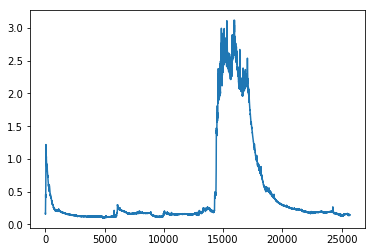

In [80]:
plt.plot(signal['wrist']['EDA']);